In [3]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('student_info.csv')

In [5]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [6]:
df.shape

(200, 2)

In [7]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


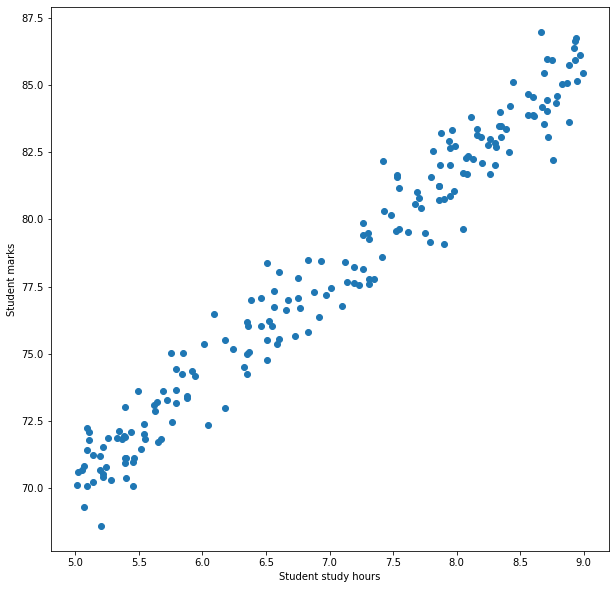

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(df.study_hours, df.student_marks)
plt.xlabel('Student study hours')
plt.ylabel('Student marks')
plt.show()

In [13]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [14]:
df = df.fillna(df['study_hours'].mean())

In [16]:
df.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [17]:
df

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19
...,...,...
195,7.530000,81.67
196,8.560000,84.68
197,8.940000,86.75
198,6.600000,78.05


In [18]:
#split dataset
X = df.drop('student_marks', axis=1)
y = df[['student_marks']]

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=1)
print('x train shape is ',x_train.shape)
print('y train shape is ',y_train.shape)
print('x test shape is ',x_test.shape)
print('y test shape is ',y_test.shape)

x train shape is  (160, 1)
y train shape is  (160, 1)
x test shape is  (40, 1)
y test shape is  (40, 1)


In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [26]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
lr.coef_

array([[3.91952524]])

In [28]:
lr.intercept_

array([50.58222739])

In [31]:
lr.predict([[2]])[0][0].round()

58.0

In [33]:
prediction = lr.predict(x_test)

In [34]:
pd.DataFrame(np.c_[x_test, y_test, prediction], columns=['Study hours', 'Obtained marks', 'Obtained marks predicted'])

,Study hours,Obtained marks,Obtained marks predicted
0,5.390000,70.90,71.708468
1,5.280000,70.27,71.277321
2,8.720000,83.08,84.760487
3,8.260000,82.99,82.957506
4,5.220000,71.50,71.042149
5,6.600000,78.05,76.451094
6,6.090000,76.48,74.452136
7,8.670000,84.19,84.564511
8,7.480000,80.17,79.900276
9,7.950000,82.68,81.742453


In [35]:
lr.score(x_test, y_test)

0.948241670182336

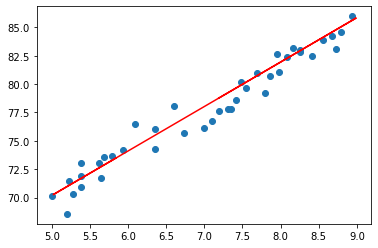

In [38]:
plt.scatter(x_test, y_test)
plt.plot(x_train, lr.predict(x_train), color='r')

In [39]:
import joblib

In [40]:
joblib.dump(lr, 'Student mark prediction.pkl')

['Student mark prediction.pkl']

In [42]:
model = joblib.load('Student mark prediction.pkl')

In [43]:
model.predict([[8]])[0][0]

81.93842930980836